# Impact Data functionalities


Import data from EM-DAT CSV file and initiate Impact()-object.



## Data Source
The International Disaster Database EM-DAT www.emdat.be

Download: https://public.emdat.be/ (register for free and download data to continue)


## Most important function
- emdat_to_impact()
- emdat_countries_by_hazard()

In [1]:
"""Load required packages and set path to CSV-file from EM-DAT"""

import os
import numpy as np
import pandas as pd
from climada.util.constants import DATA_DIR
from climada.engine.impact_data import emdat_countries_by_hazard, \
    emdat_impact_yearlysum, emdat_to_impact

# set path to CSV file downloaded from https://public.emdat.be :
emdat_file_path = os.path.join(DATA_DIR, 'demo', 'demo_emdat_impact_data_2020.csv')

2020-06-18 11:42:26,718 - climada - DEBUG - Loading default config file: /Users/eberenzs/Documents/Projects/climada_python/climada/conf/defaults.conf


In [3]:
"""get list of countries impacted by tropical cyclones from 2000 to 2019"""

iso3_codes, country_names = emdat_countries_by_hazard('TC', emdat_file_path, year_range=(2000, 2019))

print(country_names)

['American Samoa', 'Anguilla', 'Antigua and Barbuda', 'Australia', 'Bahamas', 'Bangladesh', 'Barbados', 'Belize', 'Bermuda', 'Bhutan', 'Brazil', 'Cabo Verde', 'Cambodia', 'Canada', 'Cayman Islands', 'China', 'Colombia', 'Comoros', 'Congo, Democratic Republic of the', 'Cook Islands', 'Costa Rica', 'Cuba', 'Djibouti', 'Dominica', 'Dominican Republic', 'El Salvador', 'Fiji', 'French Polynesia', 'Grenada', 'Guam', 'Guatemala', 'Haiti', 'Honduras', 'Hong Kong', 'India', 'Indonesia', 'Iran, Islamic Republic of', 'Jamaica', 'Japan', 'Kiribati', "Korea, Democratic People's Republic of", 'Korea, Republic of', "Lao People's Democratic Republic", 'Macao', 'Madagascar', 'Malawi', 'Marshall Islands', 'Mauritius', 'Mexico', 'Micronesia, Federated States of', 'Morocco', 'Mozambique', 'Myanmar', 'New Caledonia', 'New Zealand', 'Nicaragua', 'Niue', 'Northern Mariana Islands', 'Oman', 'Pakistan', 'Palau', 'Panama', 'Papua New Guinea', 'Philippines', 'Portugal', 'Puerto Rico', 'Russian Federation', 'Réun

### emdat_to_impact()
function to load EM-DAT impact data and return impact set with impact per event

##### Parameters:
- emdat_file_csv (str): Full path to EMDAT-file (CSV)
- hazard_type_emdat (str): Hazard (sub-)type according to EMDAT terminology, e.g. 'Tropical cyclone'
- OR hazard_type_climada (str): Hazard type CLIMADA abbreviation, e.g. 'TC'

##### Optional parameters:
- year_range (list with 2 integers): start and end year, e.g. [1980, 2017]
- countries (list of str): country ISO3-codes or names, e.g. ['JAM', 'CUB']. Set to None or ['all'] for all countries 
- reference_year (int): reference year of exposures for normalization. Impact is scaled proportional to GDP to the value of the reference year. No scaling for reference_year=0 (default)
- imp_str (str): Column name of impact metric in EMDAT CSV, f.i. 'Total Affected'; default = "Total Damages ('000 US\$)"

##### Returns:
- impact_instance (instance of climada.engine.Impact):
            Impact object of same format as output from CLIMADA impact computation.
            Values are scaled with GDP to reference_year if reference_year not equal 0.
            impact_instance.eai_exp holds expected annual impact for each country.
            impact_instance.coord_exp holds rough central coordinates for each country.
- countries (list): ISO3-codes of countries imn same order as in impact_instance.eai_exp


In [5]:
""" init CLIMADA Impact set from EM-DAT CSV"""

impact_emdat, countries = emdat_to_impact(emdat_file_path, \
                                    hazard_type_climada='TC', year_range=(2000,2009))

print('Number of TC events in EM-DAT 2000 to 2009 globally: %i' %(impact_emdat.event_id.size))
print('Global annual average monetary damage (AAI) from TCs as reported in EM-DAT 2000 to 2009: USD billion %2.2f' \
      %(impact_emdat.aai_agg/1e9))

impact_emdat_PHL, countries = emdat_to_impact(emdat_file_path, countries='PHL', \
                                    hazard_type_climada='TC', year_range=(2013,2013), imp_str="Total Affected")

print('TC events in EM-DAT in the Philipppines, 2013: %i' \
      %(impact_emdat_PHL.event_id.size))
print('People affected by TC events in the Philippines in 2013 (per event):')
print(impact_emdat_PHL.at_event)
print('People affected by TC events in the Philippines in 2013 (total):')
print(int(impact_emdat_PHL.aai_agg))

Number of TC events in EM-DAT 2000 to 2009 globally: 529
Global annual average monetary damage (AAI) from TCs as reported in EM-DAT 2000 to 2009: USD billion 37.97
TC events in EM-DAT in the Philipppines, 2013: 8
People affected by TC events in the Philippines in 2013 (per event):
[7.269600e+04 1.059700e+04 8.717550e+05 2.204430e+05 1.610687e+07
 3.596000e+03 3.957300e+05 2.628840e+05]
People affected by TC events in the Philippines in 2013 (total):
17944571


2020-06-18 11:47:20,708 - climada.util.finance - INFO - GDP USA 2018: 2.054e+13.
2020-06-18 11:47:21,181 - climada.util.finance - INFO - GDP USA 2000: 1.025e+13.
2020-06-18 11:47:21,656 - climada.util.finance - INFO - GDP USA 2001: 1.058e+13.
2020-06-18 11:47:22,098 - climada.util.finance - INFO - GDP USA 2002: 1.094e+13.
2020-06-18 11:47:22,572 - climada.util.finance - INFO - GDP USA 2003: 1.146e+13.
2020-06-18 11:47:23,033 - climada.util.finance - INFO - GDP USA 2004: 1.221e+13.
2020-06-18 11:47:23,483 - climada.util.finance - INFO - GDP USA 2005: 1.304e+13.
2020-06-18 11:47:23,950 - climada.util.finance - INFO - GDP USA 2006: 1.381e+13.
2020-06-18 11:47:24,401 - climada.util.finance - INFO - GDP USA 2007: 1.445e+13.
2020-06-18 11:47:24,891 - climada.util.finance - INFO - GDP USA 2008: 1.471e+13.
2020-06-18 11:47:25,344 - climada.util.finance - INFO - GDP USA 2009: 1.445e+13.
2020-06-18 11:47:25,812 - climada.util.finance - INFO - GDP USA 2010: 1.499e+13.
2020-06-18 11:47:26,266 - cl

Text(0, 0.5, 'Total Damage [USD]')

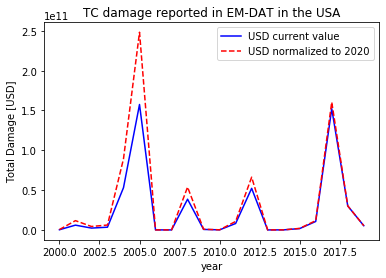

In [3]:
"""Yearly TC damages in the USA, normalized and current"""

yearly_damage_normalized_2020 = emdat_impact_yearlysum(['USA'], 'Tropical cyclone', emdat_file_path, year_range=None, \
                         reference_year=2020)

yearly_damage_current = emdat_impact_yearlysum(['USA'], 'TC', emdat_file_path)

import matplotlib.pyplot as plt

fig, axis = plt.subplots(1, 1)
axis.plot(yearly_damage_current.year, yearly_damage_current.impact, 'b', label='USD current value')
axis.plot(yearly_damage_normalized_2020.year, yearly_damage_normalized_2020.impact_scaled, 'r--', label='USD normalized to 2020')
plt.legend()
axis.set_title('TC damage reported in EM-DAT in the USA')
axis.set_xlabel('year')
axis.set_ylabel('Total Damage [USD]')
